In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive

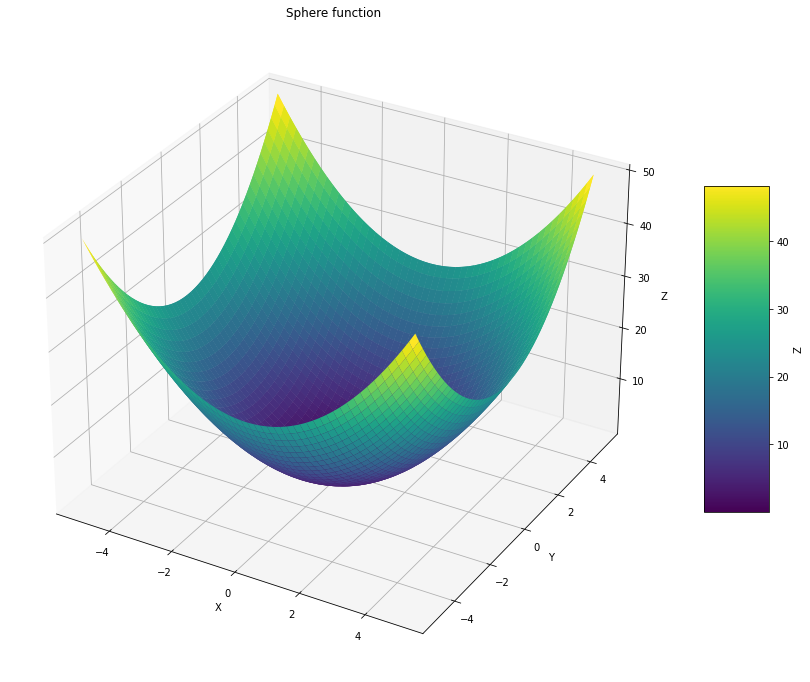

In [46]:
def sphere_function(x, y):
    return x ** 2 + y ** 2

grid_size = 400
x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
x, y = np.meshgrid(x, y)
z = sphere_function(x, y)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sphere function')

#Barra de color para la altura
cbar = fig.colorbar(ax.plot_surface(x, y, z, cmap='viridis'), ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Z')

plt.show()

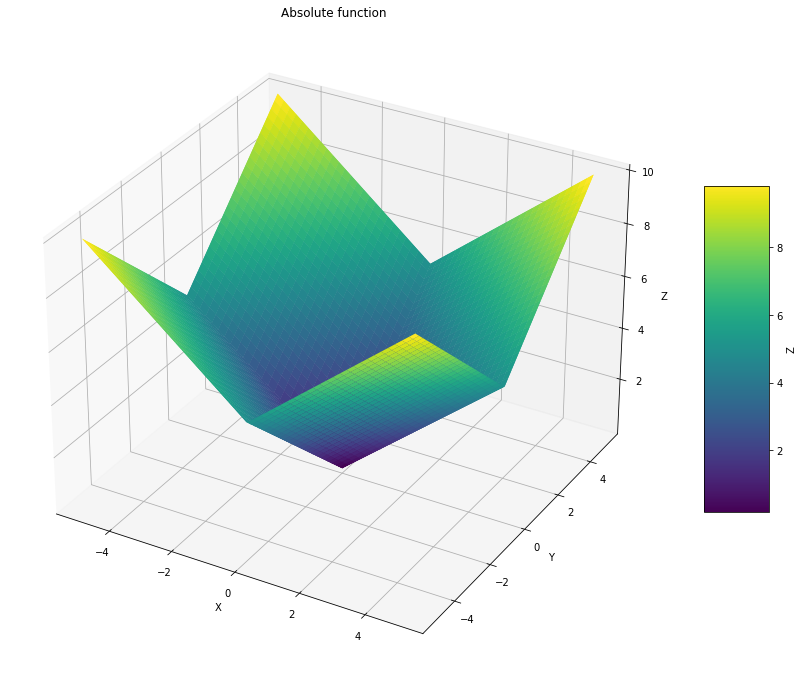

In [47]:
def abosulute_function(x, y):
    return abs(x) + abs(y)

x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
x, y = np.meshgrid(x, y)
z = abosulute_function(x, y)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Absolute function')

#Barra de color para la altura
cbar = fig.colorbar(ax.plot_surface(x, y, z, cmap='viridis'), ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Z')

plt.show()

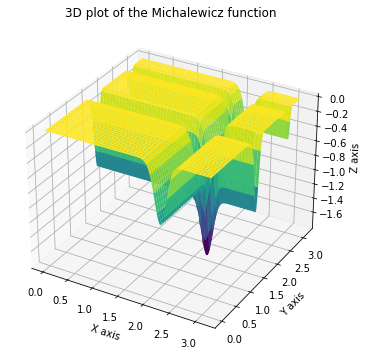

In [48]:
# Define the Michalewicz function as per the mathematical expression provided
def michalewicz(x, m=20):
    """
    Michalewicz function.

    :param x: A list or numpy array of input variables (x should be a 2D vector for this plot).
    :param m: The steepness of the valleys and ridges; a larger m leads to a more difficult search.
    :return: The result of the Michalewicz function calculation.
    """
    n = len(x)
    sum = 0
    for i in range(n):
        sum -= np.sin(x[i]) * (np.sin((i+1) * x[i]**2 / np.pi))**(2 * m)
    return sum

# Set up grid for plotting
x = np.linspace(0, np.pi, 400)
y = np.linspace(0, np.pi, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Compute function values
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = michalewicz([X[i, j], Y[i, j]])

# Plot the Michalewicz function interactively
def plot_michalewicz(m=20):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D plot of the Michalewicz function')
    plt.show()

#Barra de color para la altura
cbar = fig.colorbar(ax.plot_surface(x, y, z, cmap='viridis'), ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Z')

plot_michalewicz(20)

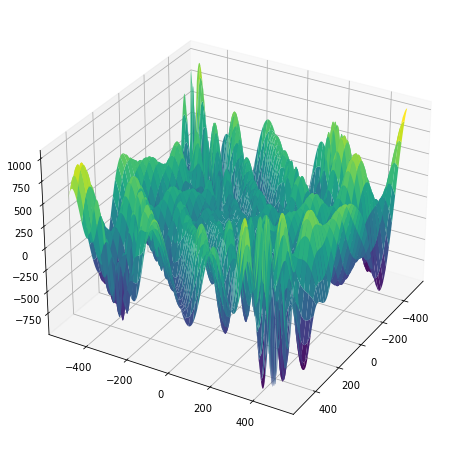

In [11]:
# Define the Eggholder function
def eggholder(x, y):
    """
    Eggholder function.

    :param x: x coordinate on the grid.
    :param y: y coordinate on the grid.
    :return: The result of the Eggholder function calculation.
    """
    term1 = -(y + 47) * np.sin(np.sqrt(np.abs(y + x/2 + 47)))
    term2 = -x * np.sin(np.sqrt(np.abs(x - (y + 47))))
    return term1 + term2

# Set up grid for plotting
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)
X, Y = np.meshgrid(x, y)
Z = eggholder(X, Y)

def plot_3d(elev=30, azim=30):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev, azim=azim)
    ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)
    plt.show()

plot_3d()

# # Create interactive sliders for elevation and azimuth
# interactive_plot = interactive(plot_3d, elev=(-90, 90), azim=(-180, 180))
# interactive_plot


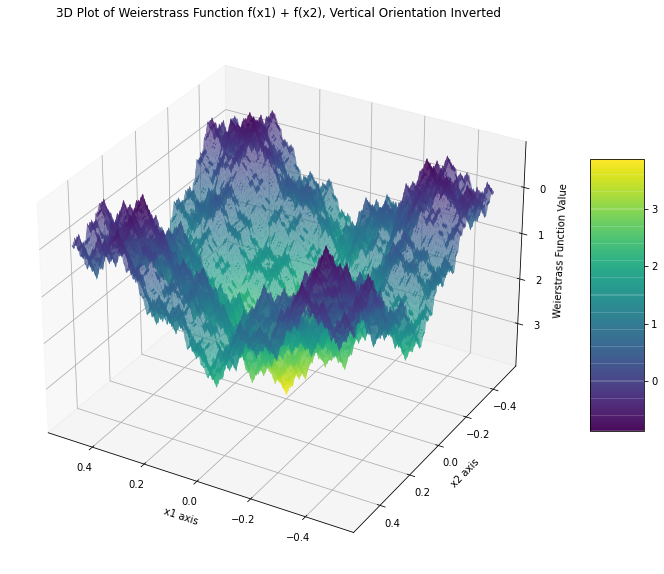

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definición de la función de Weierstrass
def weierstrass_function(x, a, b, n_terms=100):
    return np.sum([a**n * np.cos(b**n * np.pi * x) for n in range(n_terms)], axis=0)

# Definición de la función de Weierstrass para dos variables independientes
def weierstrass_function_sum(x, y, a, b, n_terms=50):
    return weierstrass_function(x, a, b, n_terms) + weierstrass_function(y, a, b, n_terms)

# Parámetros a y b
a = 0.5
b = 3  # b es un entero impar y positivo
assert 0 < a < 1 and b % 2 == 1 and a*b > 1 + 3/(2*np.pi), "Los parámetros no cumplen con las condiciones establecidas."

# Creación de una malla de puntos en el plano xy
grid_size = 400
x = np.linspace(-0.5, 0.5, grid_size)
y = np.linspace(-0.5, 0.5, grid_size)
X, Y = np.meshgrid(x, y)

# Cálculo de los valores de Z aplicando la función de Weierstrass
Z = weierstrass_function_sum(X, Y, a, b)

# Creación de la gráfica 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', rstride=1, cstride=1, alpha=0.8, edgecolor='none')

# Inversión del eje z
ax.invert_zaxis()

# Etiquetas y título
ax.set_xlabel('x1 axis')
ax.set_ylabel('x2 axis')
ax.set_zlabel('Weierstrass Function Value')
ax.set_title('3D Plot of Weierstrass Function f(x1) + f(x2), Vertical Orientation Inverted')

# Ajustes de visualización
ax.view_init(azim=120)  # Cambia la perspectiva de visualización
fig.colorbar(surf, shrink=0.5, aspect=5)  # Añade una barra de colores para la escala de z

# Mostrar la gráfica
plt.show()


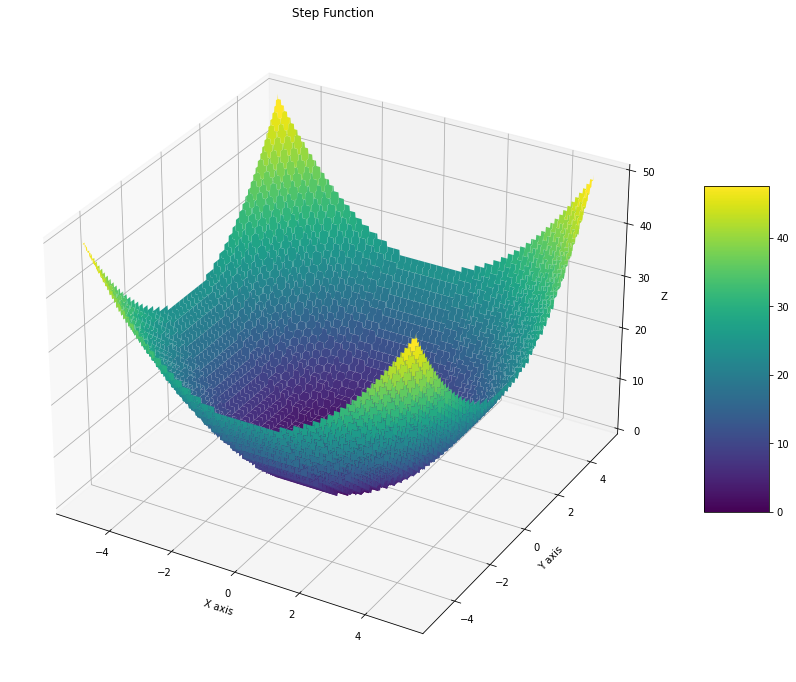

In [51]:
def floor_function(x, y):
    return np.floor(x**2) + np.floor(y**2)

grid_size = 800
x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
X, Y = np.meshgrid(x, y)
Z_floor = floor_function(X, Y)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_floor, cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z')
ax.set_title('Step Function')

fig.colorbar(surf, shrink=0.5, aspect=5) 

plt.show()